# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from models.oface_mouth_model import OpenfaceMouth
from data_loaders.data_loader import DLName
from net_trainer import NetworkTrainer

# Start Network Trainer

In [4]:
kwargs = { 
    'exp_params' : {
        'name': 'train_mobilenetv2',
        'description': 'Balancing input dataset and drawing GradCAM output',
        'tags': ['mobilenetv2','gradcam'],
        'src_files': ['net_trainer.py']
    },
    'properties': {
        'tagger_model': OpenfaceMouth(),
        'dl_names': [DLName.FVC_PYBOSSA],
        'req': cts.ICAO_REQ.MOUTH,
        'aligned': True 
    },
    'net_train_params': {
        'batch_size': 64,
        'n_epochs': 30,
        'early_stopping': 10,
        'shuffle': False,
        'dense_units': 128,
        'learning_rate': 1e-4,
        'optimizer': 'Adam',
        'dropout': 0.5,
        'train_prop': 0.8,
        'validation_prop': 0.1,
        'test_prop': 0.1,
        'seed': 42,
        'validation_split': 0.2
    }
}

trainer = NetworkTrainer(use_neptune=False, **kwargs)

-----
Use Neptune:  False
-----
Args: 
{'exp_params': {'description': 'Balancing input dataset and drawing GradCAM '
                               'output',
                'name': 'train_mobilenetv2',
                'src_files': ['mobilenet_trainer.py', 'net_trainer.py'],
                'tags': ['mobilenetv2', 'gradcam']},
 'net_train_params': {'batch_size': 64,
                      'dense_units': 128,
                      'dropout': 0.5,
                      'early_stopping': 10,
                      'learning_rate': 0.0001,
                      'n_epochs': 30,
                      'optimizer': 'Adam',
                      'seed': 42,
                      'shuffle': False,
                      'test_prop': 0.1,
                      'train_prop': 0.8,
                      'validation_prop': 0.1,
                      'validation_split': 0.2},
 'properties': {'aligned': True,
                'dl_names': [<DLName.FVC_PYBOSSA: 'fvc_pybossa'>],
                'req': <ICAO_R

# Load Data

In [5]:
trainer.load_training_data()

Loading data
Input data.shape: (5780, 4)
Number of Samples: 5780
Data loaded


# Data Balancing

In [6]:
trainer.balance_input_data()

Balancing input dataset..
df_comp.shape: (4568, 4), df_non_comp.shape: (1212, 4)
final_df.shape:  (2424, 4)
n_comp:  1212
n_non_comp:  1212
Input dataset balanced


# Data Generators

In [7]:
trainer.setup_data_generators()

Starting data generators
Found 1746 validated image filenames.
Found 436 validated image filenames.
Found 242 validated image filenames.
TOTAL: 2424


# Use Neptune

In [7]:
trainer.start_neptune()
trainer.create_experiment()

Starting Neptune


# Training Model

In [8]:
trainer.train_model()

Training mobilenetv2 network
Epoch 1/30
27/27 [==============================] - 4s 156ms/step - loss: 0.8807 - accuracy: 0.5149 - val_loss: 0.7186 - val_accuracy: 0.4948
Epoch 2/30
27/27 [==============================] - 4s 137ms/step - loss: 0.7716 - accuracy: 0.5071 - val_loss: 0.7079 - val_accuracy: 0.5391
Epoch 3/30
27/27 [==============================] - 4s 138ms/step - loss: 0.7349 - accuracy: 0.5036 - val_loss: 0.7020 - val_accuracy: 0.5052
Epoch 4/30
27/27 [==============================] - 4s 136ms/step - loss: 0.7169 - accuracy: 0.5166 - val_loss: 0.6991 - val_accuracy: 0.5339
Epoch 5/30
27/27 [==============================] - 4s 131ms/step - loss: 0.7112 - accuracy: 0.4899 - val_loss: 0.6978 - val_accuracy: 0.5443
Epoch 6/30
27/27 [==============================] - 4s 131ms/step - loss: 0.7044 - accuracy: 0.5083 - val_loss: 0.6970 - val_accuracy: 0.5365
Epoch 7/30
27/27 [==============================] - 4s 132ms/step - loss: 0.7025 - accuracy: 0.4905 - val_loss: 0.6963 

# Plots

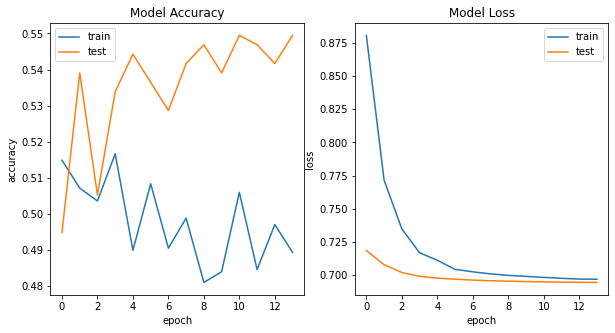

In [9]:
trainer.draw_training_history()

# Saving Trained Model

# Test Trained Model

In [10]:
trainer.test_model()

Testing Trained Model
              precision    recall  f1-score   support

    NON_COMP       0.54      0.46      0.50       137
        COMP       0.41      0.50      0.45       105

    accuracy                           0.48       242
   macro avg       0.48      0.48      0.47       242
weighted avg       0.49      0.48      0.48       242

Model Accuracy: 0.4752


# Evaluate Model

In [11]:
trainer.evaluate_model()

Evaluating model
TEST loss:  0.6992
TEST accuracy:  0.4752


# Vizualize Model Classification

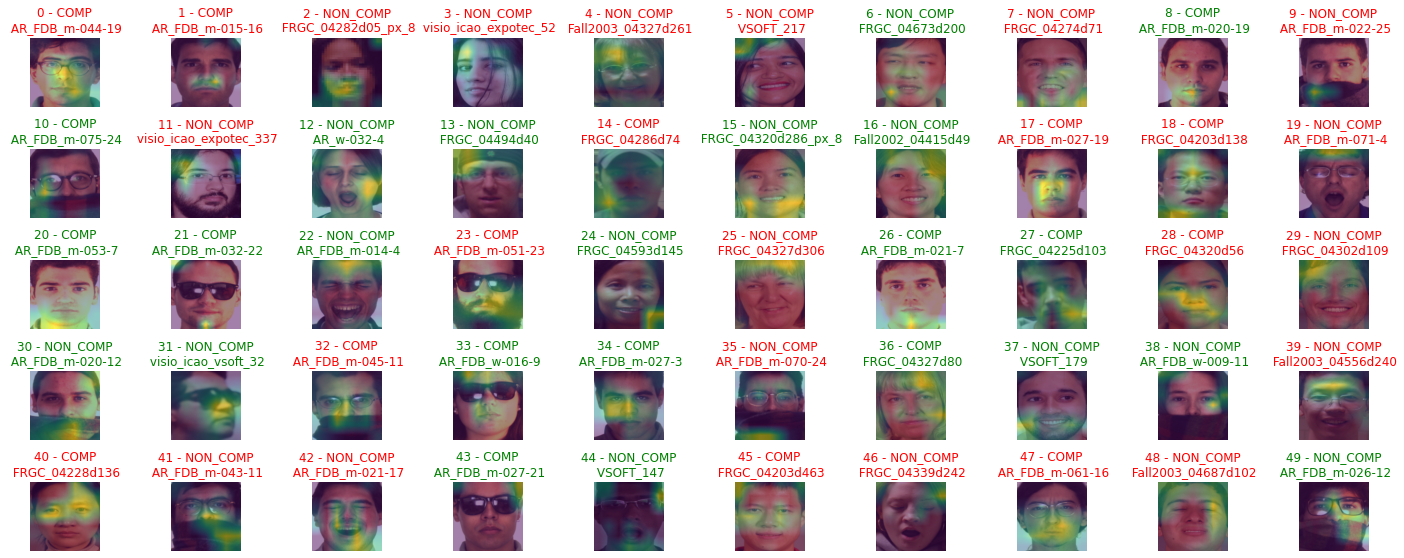

In [14]:
trainer.vizualize_predictions()

# Finishing Experiment Manager

In [15]:
trainer.finish_experiment()

Finishing Neptune
